##### An example of using foresee from jupyter notebook

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import sys
import pandas as pd
import numpy as np

In [3]:
# import local modules

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+'\\scripts')

import main
import utils

In [4]:
# sample time-series dataframe with only one column

ts_df = utils.read_csv('basic_time_series_data.csv')
ts_df.head(2)

,Close
0,75.779999
1,75.610001


In [5]:
# user defind parameters

# time series values column name: required if input dataframe has more than one column

endog_colname = None

if len(ts_df.columns) > 1 and endog_colname is None:
    raise ValueError('time series column name is required!!!')

freq = 5
fcst_length = 10
model_list = ['ewm_model', 'fft', 'holt_winters', 'prophet', 'sarimax']

'''
avilable run types: 'best_model', 'all_best', 'all_models'
'''

run_type = 'all_best'

# if comparing models (run_type is 'best_model' or 'all_best') then holdout length is required

if run_type == 'all_models':
    holdout_length = None
else:
    holdout_length = 20


# we are working with one time series and no date-time column so time series id and date-time column name are set to None.
gbkey = None
ds_column = None

In [6]:
'''
result:  dataframe containing fitted values and future forecasts
fit_results_list:  list of dictionaries containing fitted values, forecasts, and errors (useful for debuging)
'''

result, fit_result_list = main.collect_result(
                                                    ts_df,
                                                    endog_colname,
                                                    gbkey,
                                                    ds_column, 
                                                    freq, 
                                                    fcst_length, 
                                                    run_type, 
                                                    holdout_length, 
                                                    model_list
                                            )

result.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ewm_model_forecast,ewm_model_wfa,fft_forecast,fft_wfa,holt_winters_forecast,holt_winters_wfa,prophet_forecast,prophet_wfa,sarimax_forecast,sarimax_wfa,ts_id,best_model
0,75.779999,0.95879,74.468266,0.946171,75.779999,0.954586,75.316435,0.981905,0.000000,0.96388,1,prophet
1,75.678000,0.95879,74.858440,0.946171,75.610001,0.954586,75.094509,0.981905,75.818473,0.96388,1,prophet
2,76.209475,0.95879,74.996641,0.946171,76.800003,0.954586,74.455410,0.981905,75.648389,0.96388,1,prophet
3,76.018616,0.95879,74.860879,0.946171,75.750000,0.954586,73.537218,0.981905,76.838995,0.96388,1,prophet
4,75.182274,0.95879,74.457553,0.946171,73.839996,0.954586,73.682707,0.981905,75.788459,0.96388,1,prophet


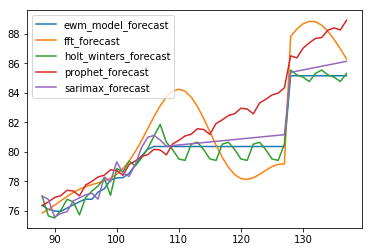

In [7]:
# m_list = model_list.remove('prophet')
for k, df in result.groupby('ts_id'):
    df.iloc[-50:].plot(y=[x+'_forecast' for x in model_list])


In [8]:
for item in fit_result_list:
    for model in model_list:
        if item[model+'_err'] is not None:
            print(model + ': ' + item[model+'_err'])